In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_data.shape

(9240, 37)

In [6]:
# check for duplicate 
Lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [7]:
Lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate values in Prospect ID and Lead Number

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.


# EXPLORATORY DATA ANALYSIS
Data Cleaning & Treatment:

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Converting 'Select' values to NaN.

Lead_data = Lead_data.replace('Select', np.nan)

In [10]:
Lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [11]:
# Dropping unique valued columns
Lead_data= Lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [12]:
#checking null values in each rows

Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [13]:

# % of null value
round(100*(Lead_data.isnull().sum())/len(Lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
#dropping cols with more than 45% missing values

Lead_data = Lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)


In [15]:
Lead_data.shape

(9240, 23)

In [16]:
#checking null values percentage
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [17]:
Lead_data['Specialization'] = Lead_data['Specialization'].fillna('not provided')
Lead_data['City'] = Lead_data['City'].fillna('not provided')
Lead_data['Tags'] = Lead_data['Tags'].fillna('not provided')
Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].fillna('not provided')
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].fillna('not provided')
Lead_data['Country'] = Lead_data['Country'].fillna('not provided')
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [18]:
#checking null values percentage
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [19]:
Lead_data.shape

(9240, 23)

In [20]:
Lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [21]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Lead_data['Country'] = Lead_data.apply(lambda x:slots(x['Country']), axis = 1)
Lead_data['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [22]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

Lead_data['Country'] = Lead_data['Country'].replace('not provided','India')
Lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [23]:
# Checking the percent of lose if the null values are removed
round(100*(sum(Lead_data.isnull().sum(axis=1) > 1)/Lead_data.shape[0]),2)

1.48

In [24]:
Lead_data = Lead_data[Lead_data.isnull().sum(axis=1) <1]

In [25]:
# Rechecking the percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [26]:
Lead_data.shape

(9074, 23)

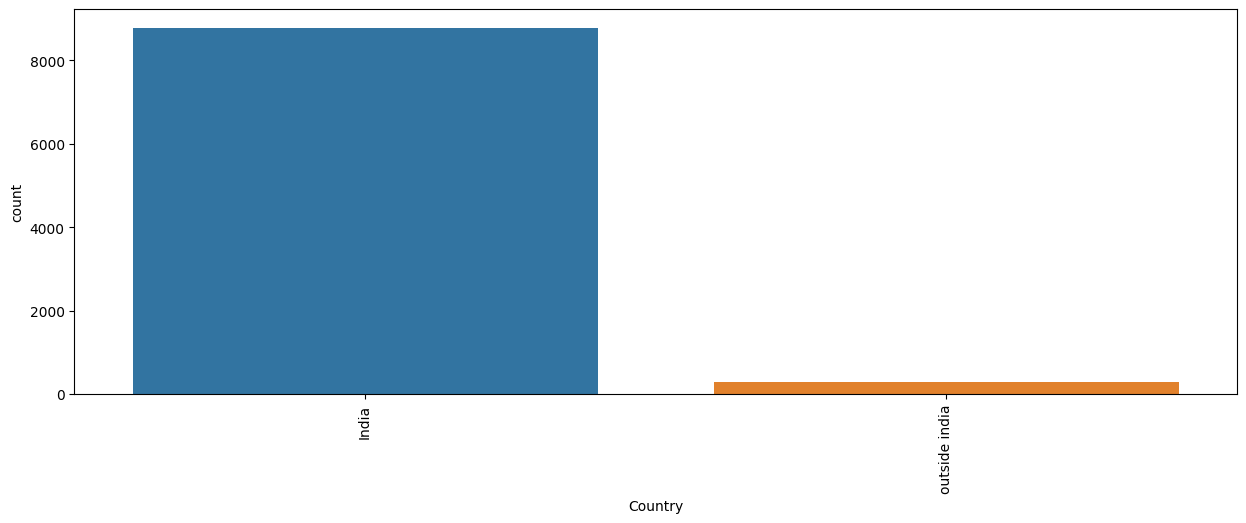

In [27]:
#plotting spread of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(x=Lead_data.Country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
#creating a list of columns to be droppped
cols_to_drop=['Country']

In [29]:
#checking value counts of "City" column
Lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

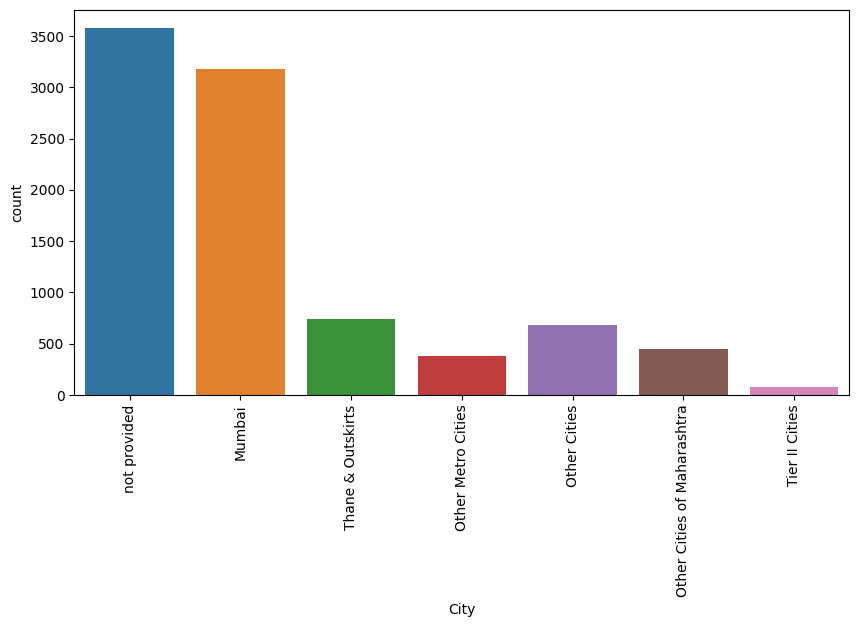

In [30]:
#plotting spread of City columnn
plt.figure(figsize=(10,5))
s1=sns.countplot(x=Lead_data.City)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

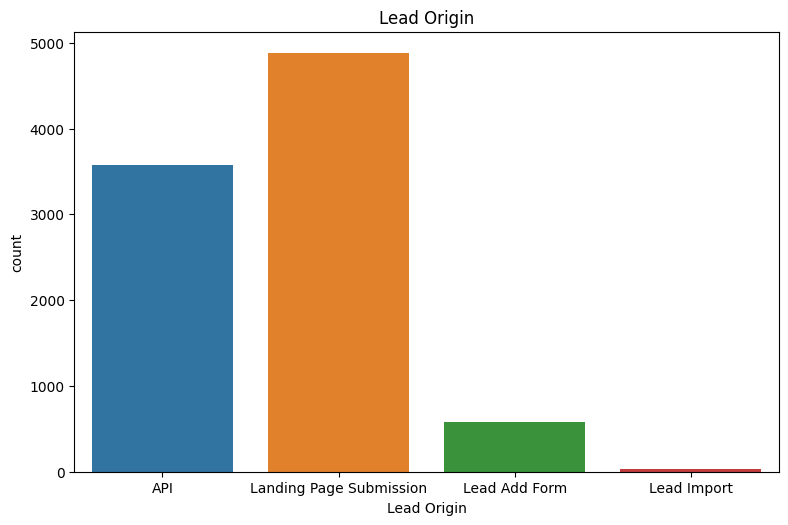

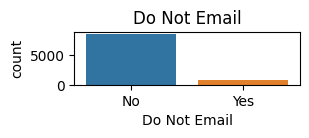

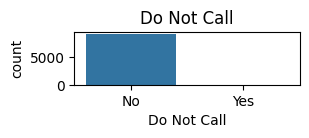

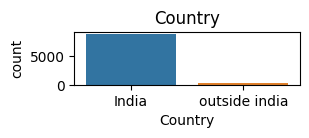

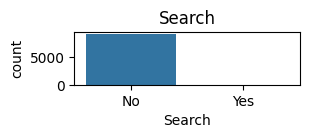

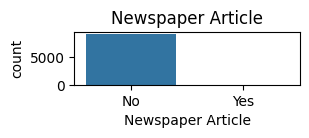

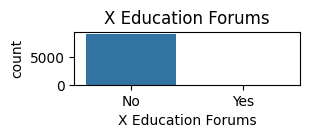

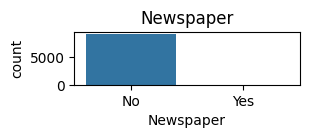

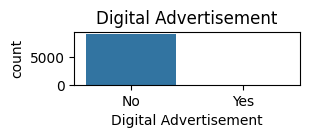

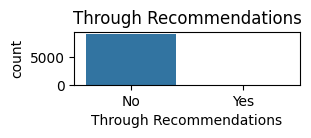

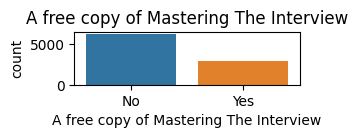

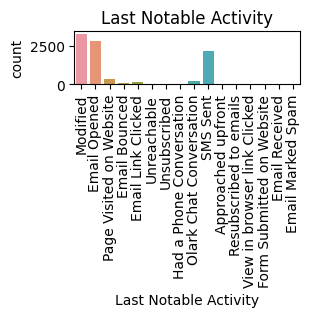

In [33]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
sns.countplot(data=Lead_data, x='Lead Origin')
plt.title('Lead Origin')
plt.show()


plt.subplot(6, 2, 2)
sns.countplot(data=Lead_data, x='Do Not Email')
plt.title('Do Not Email')
plt.show()


plt.subplot(6, 2, 3)
sns.countplot(data=Lead_data, x='Do Not Call')
plt.title('Do Not Call')
plt.show()


plt.subplot(6, 2, 4)
sns.countplot(data=Lead_data, x='Country')
plt.title('Country')
plt.show()


plt.subplot(6, 2, 5)
sns.countplot(data=Lead_data, x='Search')
plt.title('Search')
plt.show()


plt.subplot(6, 2, 6)
sns.countplot(data=Lead_data, x='Newspaper Article')
plt.title('Newspaper Article')
plt.show()


plt.subplot(6, 2, 7)
sns.countplot(data=Lead_data, x='X Education Forums')
plt.title('X Education Forums')
plt.show()


plt.subplot(6, 2, 8)
sns.countplot(data=Lead_data, x='Newspaper')
plt.title('Newspaper')
plt.show()


plt.subplot(6, 2, 9)
sns.countplot(data=Lead_data, x='Digital Advertisement')
plt.title('Digital Advertisement')
plt.show()


plt.subplot(6, 2, 10)
sns.countplot(data=Lead_data, x='Through Recommendations')
plt.title('Through Recommendations')
plt.show()


plt.subplot(6, 2, 11)
sns.countplot(data=Lead_data, x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')
plt.show()


plt.subplot(6, 2, 12)
sns.countplot(data=Lead_data, x='Last Notable Activity')
plt.xticks(rotation=90)
plt.title('Last Notable Activity')
plt.show()





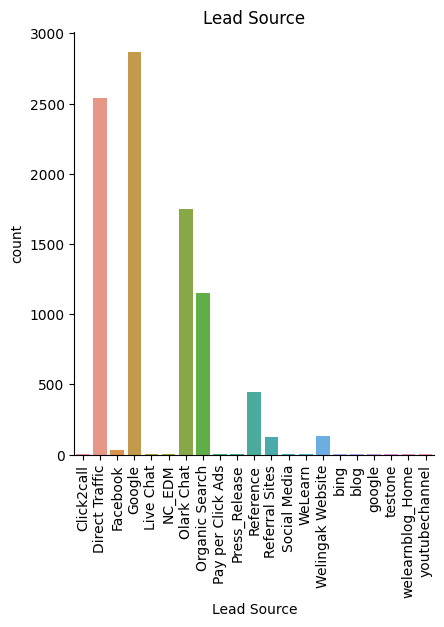

In [35]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].astype('category')
sns.catplot(x='Lead Source', kind='count', data=Lead_data)
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

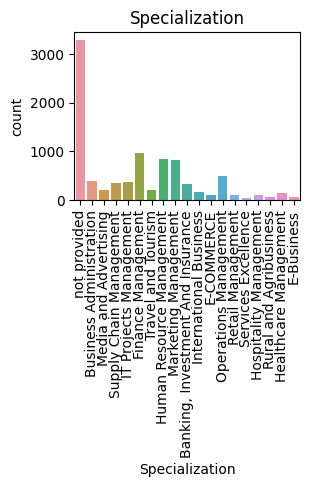

In [36]:
plt.subplot(2, 2, 1)
sns.countplot(x=Lead_data['Specialization']).tick_params(axis='x', rotation=90)
plt.title('Specialization')
plt.show()

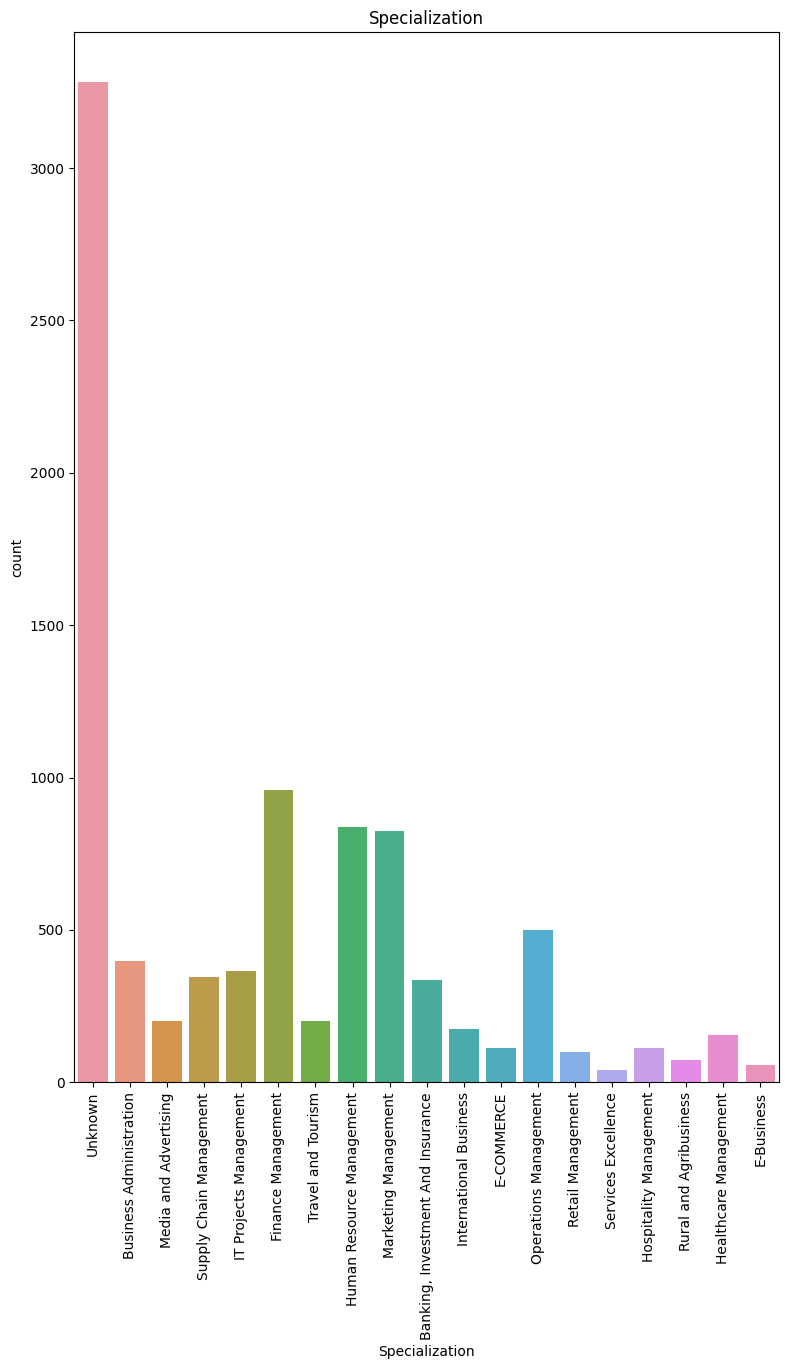

In [44]:
Lead_data['Specialization'] = Lead_data['Specialization'].replace('not provided', 'Unknown')
plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.countplot(x='Specialization', data=Lead_data)
plt.xticks(rotation=90)
plt.title('Specialization')
plt.show()

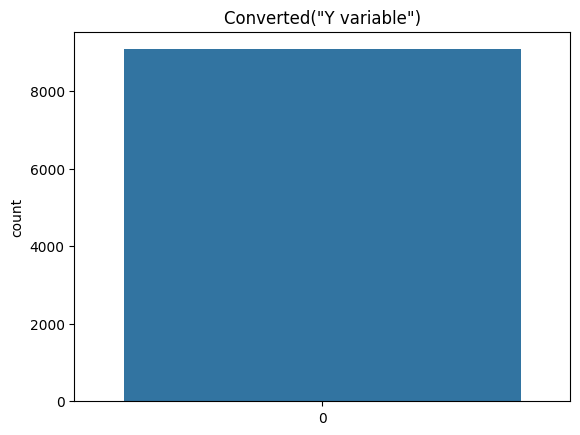

In [45]:
sns.countplot(Lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

# Numerical Variables

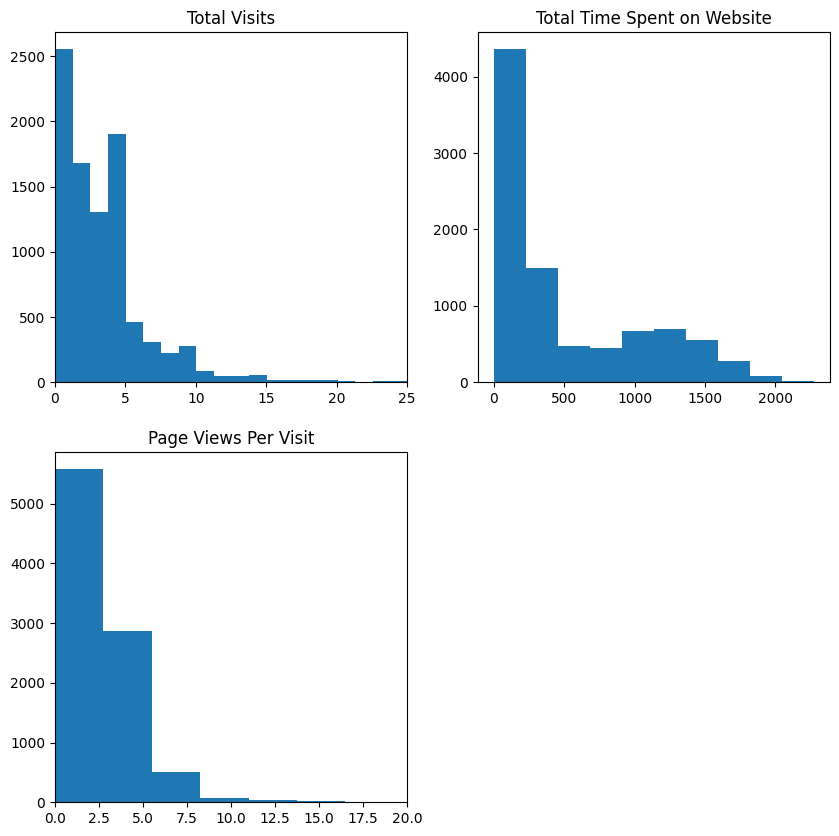

In [46]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )   

# Relating all the categorical variables to Converted


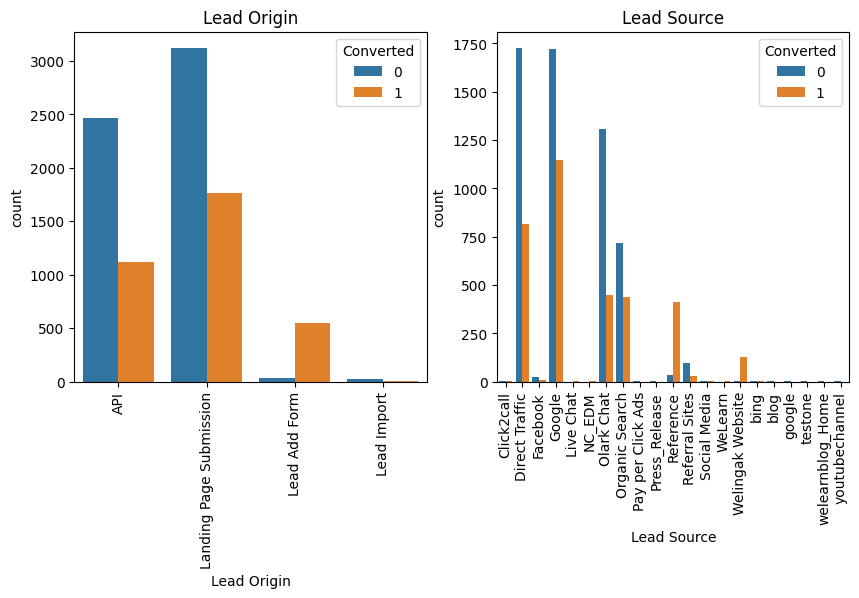

In [47]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

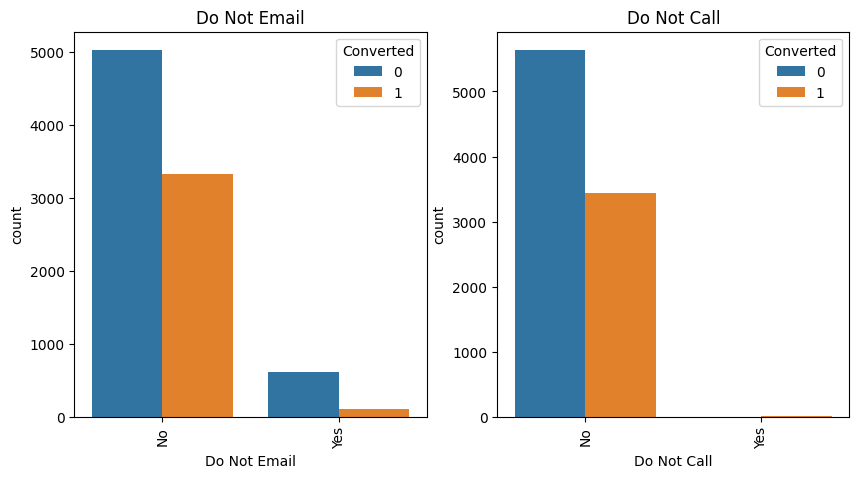

In [48]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

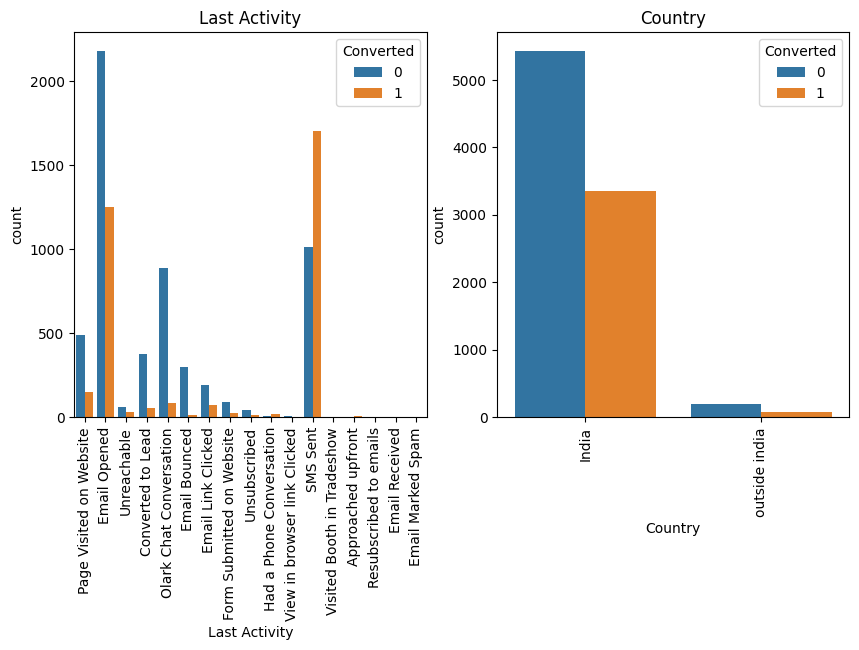

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

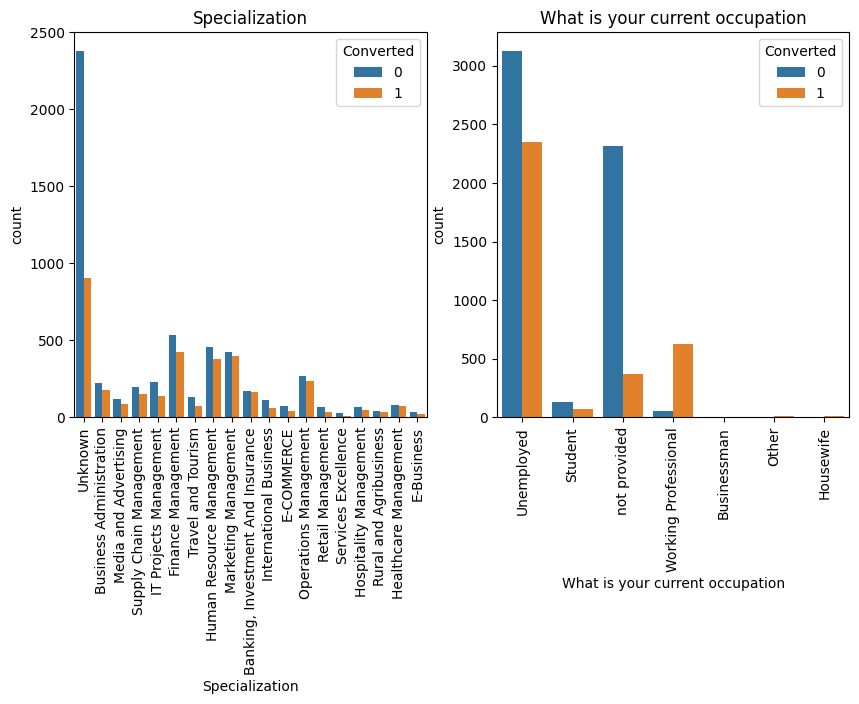

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

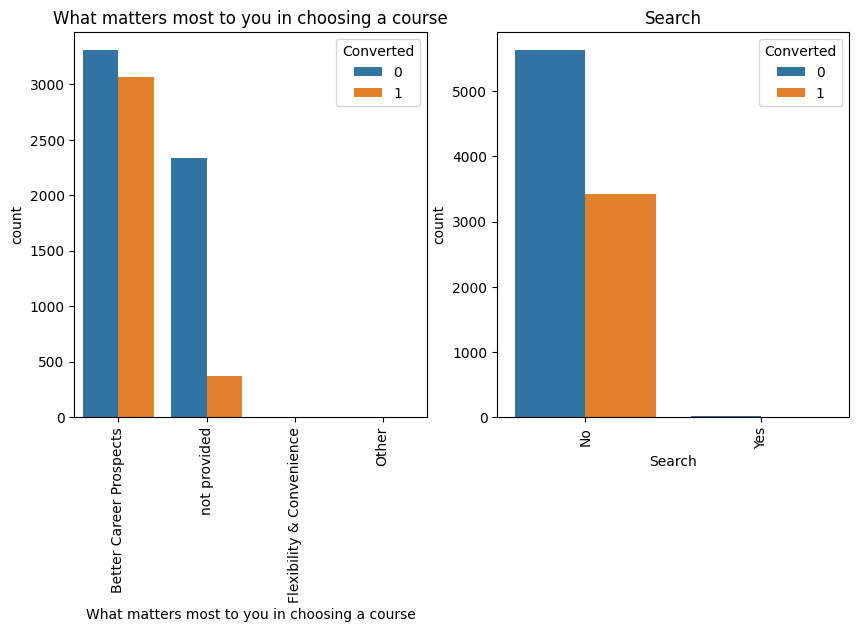

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

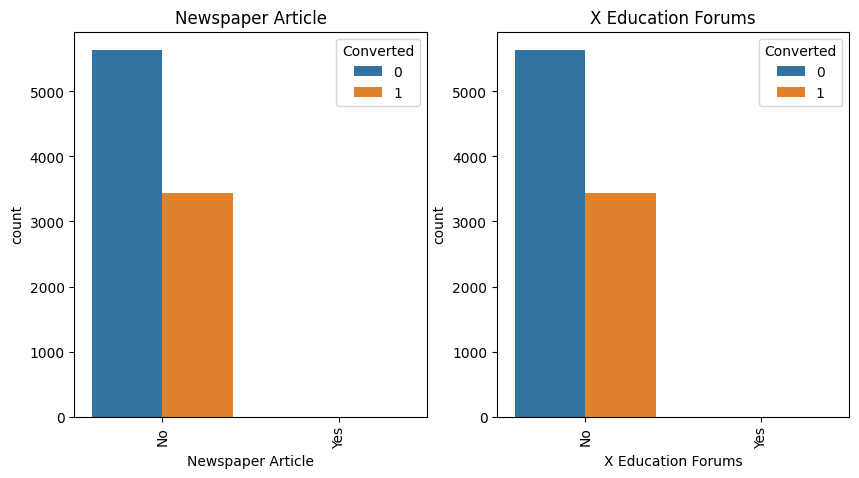

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

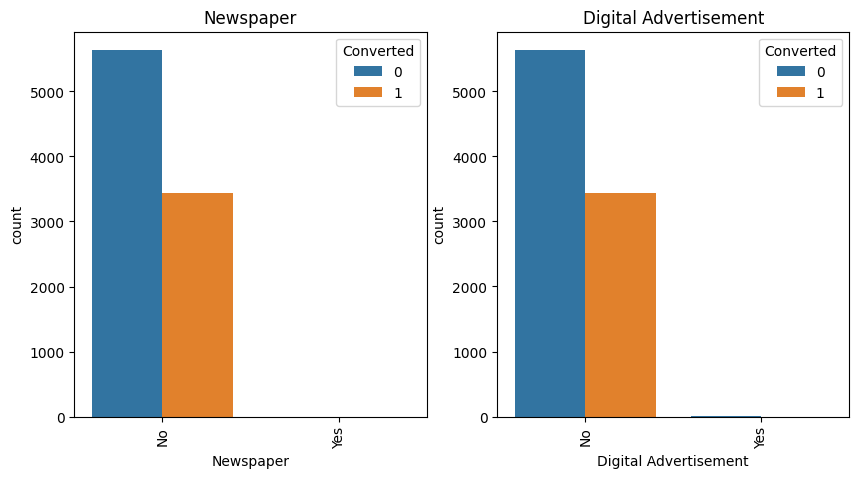

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

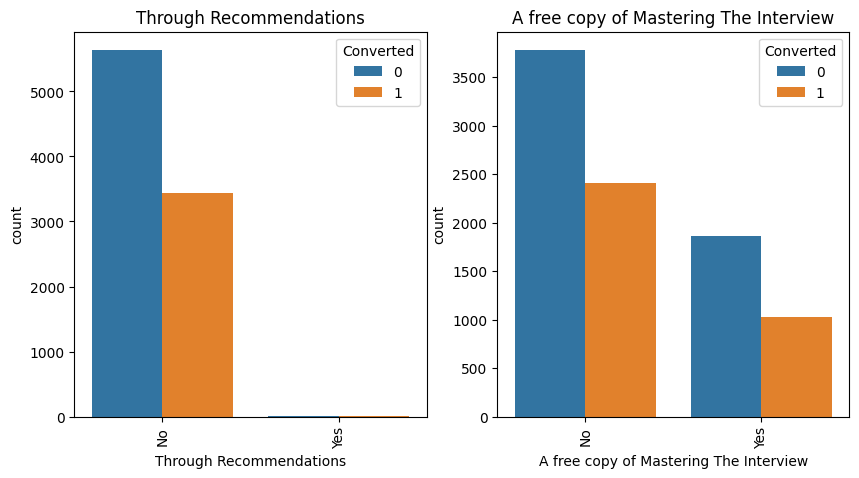

In [54]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

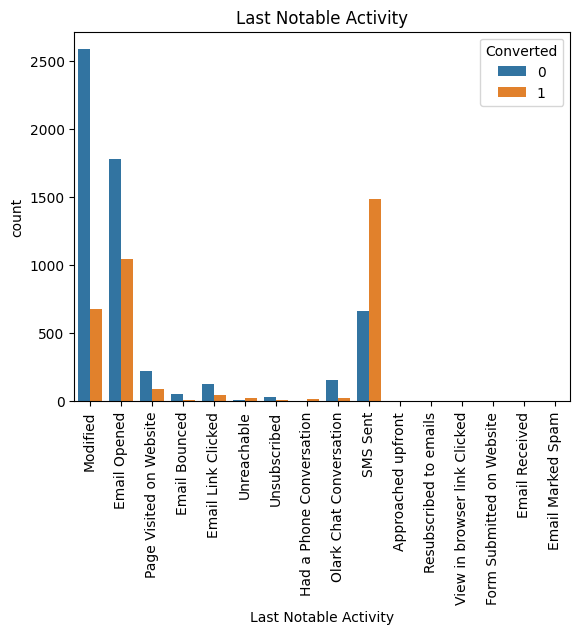

In [55]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

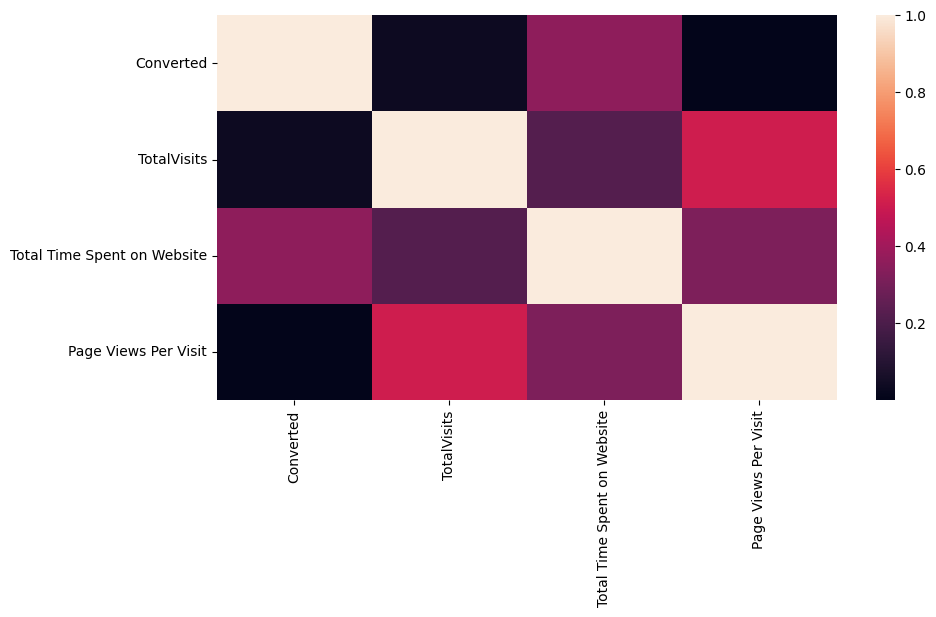

In [56]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Lead_data.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

### Outlier


In [57]:
numeric = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


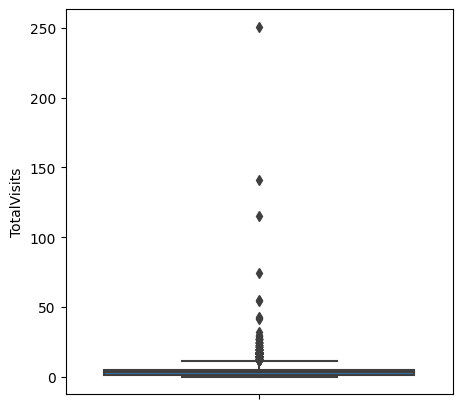

In [58]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

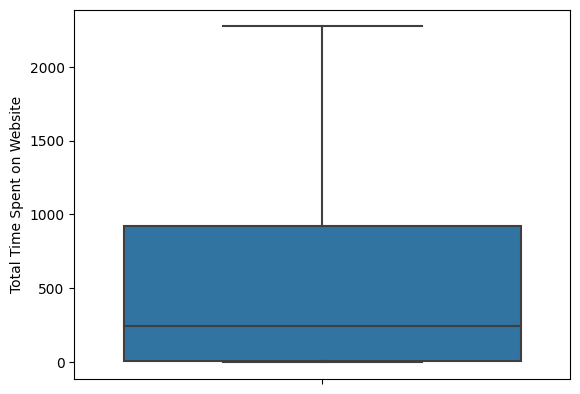

In [59]:
sns.boxplot(y=Lead_data['Total Time Spent on Website'])
plt.show()

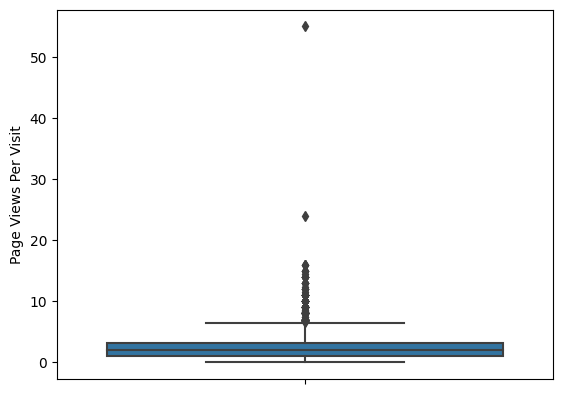

In [60]:
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()

We can see presence of outliers in TotalVisits

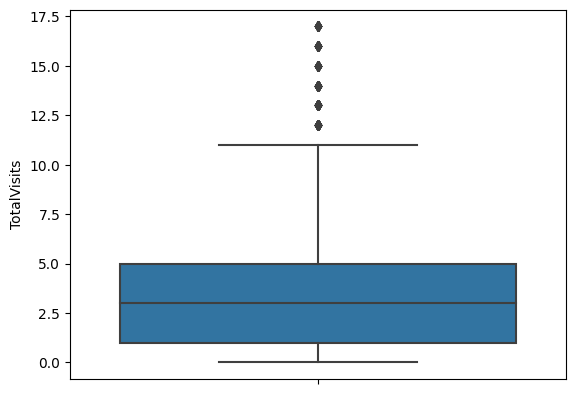

In [61]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_data.TotalVisits.quantile(0.99)
Lead_data = Lead_data[(Lead_data.TotalVisits <= Q3)]
Q1 = Lead_data.TotalVisits.quantile(0.01)
Lead_data = Lead_data[(Lead_data.TotalVisits >= Q1)]
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

# Dummy Variables

In [62]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

We can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy .


In [63]:
#dropping columns
Lead_data = Lead_data.drop(cols_to_drop,1)
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8991 non-null   object  
 1   Lead Source                                    8991 non-null   category
 2   Do Not Email                                   8991 non-null   object  
 3   Do Not Call                                    8991 non-null   object  
 4   Converted                                      8991 non-null   int64   
 5   TotalVisits                                    8991 non-null   float64 
 6   Total Time Spent on Website                    8991 non-null   int64   
 7   Page Views Per Visit                           8991 non-null   float64 
 8   Last Activity                                  8991 non-null   object  
 9   Specialization                           

In [64]:
#getting a list of categorical columns
cat_cols= Lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_data, dummy], axis=1)
Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unknown,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [67]:
Lead_data_dum = Lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Test-Train Split

In [68]:
 #Import the required library
from sklearn.model_selection import train_test_split

In [69]:
X = Lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
# Putting the target variable in y
y = Lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)


In [72]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [91]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [98]:
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 20 variables as output
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [99]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', False, 36),
 ('Specialization_Finance Management', False, 18),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 38),
 ('Specialization_IT Projects Management', False, 33),
 ('Specialization_International Business', False, 35),
 ('Specialization_Marketing Management', False, 19),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', False, 27),
 ('Specialization_Retail Management', True, 1),
 ('Specialization_Rural and Agribusiness', False, 37),
 ('Specialization_Services Excel

In [100]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [101]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [102]:
# Importing statsmodels
import statsmodels.api as sm

In [103]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2443.9
Date:                Sun, 23 Apr 2023   Deviance:                       4887.9
Time:                        12:06:52   Pearson chi2:                 6.29e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4227
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7780      0.478     -1.629      0.103      -1.714       0.158
TotalVisits                                              1.7255      0.317      5.439      0.000       1.104       2.347
Total Time Spent on Website                              4.6649      0.176     26.432      0.000       4.319       5.011
Page Views Per Visit                                    -2.2672      0.470     -4.824      0.000      -3.188      -1.346
Lead Origin_Landing Page Submission                     -0.7346      0.141     -5.193      0.000      -1.012      -0.457
Lead Origin_Lead Add Form                               23.0822   4.31e+04      0.001      1.000   -8.45e+04    8.45e+04
Specialization_Hospitality Management                   -0.4421      0.347     -1.275      0.202      -1.122       0.238
Specialization_Media and Advertising                    -0.3836      0.240     -1.597      0.110      -0.854       0.087
Specialization_Retail Management                        -0.5522      0.335     -1.648      0.099      -1.209       0.105
Specialization_Unknown                                  -0.9026      0.133     -6.778      0.000      -1.164      -0.642
Lead Source_Direct Traffic                              -0.7608      0.433     -1.756      0.079      -1.610       0.088
Lead Source_Google                                      -0.3301      0.429     -0.769      0.442      -1.171       0.511
Lead Source_NC_EDM                                      23.6768   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   0.7856      0.429      1.831      0.067      -0.055       1.627
Lead Source_Organic Search                              -0.6167      0.441     -1.399      0.162      -1.481       0.248
Lead Source_Reference                                  -20.1144   4.31e+04     -0.000      1.000   -8.45e+04    8.45e+04
Lead Source_Referral Sites                              -0.4474      0.536     -0.834      0.404      -1.499       0.604
Lead Source_Social Media                                24.0347   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                           -17.2510   4.31e+04     -0.000      1.000   -8.45e+04    8.45e+04
Do Not Email_Yes                                        -1.3244      0.212     -6.248      0.000      -1.740      -0.909
Last Activity_Converted to Lead                         -0.8217      0.233     -3.521      0.000      -1.279      -0.364
Last Activity_Email Bounced                             -1.0581      0.411     -2.578      0.010      -1.863      -0.254
Last Activity_Form Submitted on Website                 -0

In [104]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
39,Last Notable Activity_Resubscribed to emails,inf
25,Last Activity_Resubscribed to emails,inf
4,Lead Origin_Lead Add Form,139.11
14,Lead Source_Reference,105.51
17,Lead Source_Welingak Website,33.94
10,Lead Source_Google,13.97
9,Lead Source_Direct Traffic,13.47
3,Lead Origin_Landing Page Submission,8.36
34,Last Notable Activity_Email Opened,8.20
12,Lead Source_Olark Chat,7.53


The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.


In [106]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [107]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.5
Date:                Sun, 23 Apr 2023   Deviance:                       4901.1
Time:                        12:07:43   Pearson chi2:                 6.32e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4214
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7148      0.477     -1.499      0.134      -1.650       0.220
TotalVisits                                              1.7025      0.316      5.380      0.000       1.082       2.323
Total Time Spent on Website                              4.6618      0.176     26.453      0.000       4.316       5.007
Page Views Per Visit                                    -2.2513      0.469     -4.796      0.000      -3.171      -1.331
Lead Origin_Landing Page Submission                     -0.7378      0.141     -5.226      0.000      -1.015      -0.461
Lead Origin_Lead Add Form                               21.0864   1.59e+04      0.001      0.999   -3.11e+04    3.11e+04
Specialization_Hospitality Management                   -0.4494      0.347     -1.294      0.196      -1.130       0.231
Specialization_Media and Advertising                    -0.3878      0.240     -1.615      0.106      -0.858       0.083
Specialization_Retail Management                        -0.5555      0.335     -1.659      0.097      -1.212       0.101
Specialization_Unknown                                  -0.9169      0.133     -6.890      0.000      -1.178      -0.656
Lead Source_Direct Traffic                              -0.7588      0.433     -1.752      0.080      -1.608       0.090
Lead Source_Google                                      -0.3236      0.429     -0.754      0.451      -1.165       0.517
Lead Source_NC_EDM                                      21.6591   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.7833      0.429      1.825      0.068      -0.058       1.624
Lead Source_Organic Search                              -0.6218      0.441     -1.410      0.158      -1.486       0.242
Lead Source_Reference                                  -18.0708   1.59e+04     -0.001      0.999   -3.11e+04    3.11e+04
Lead Source_Referral Sites                              -0.4634      0.537     -0.862      0.389      -1.517       0.590
Lead Source_Social Media                                22.0304   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                           -15.2437   1.59e+04     -0.001      0.999   -3.11e+04    3.11e+04
Do Not Email_Yes                                        -1.3373      0.212     -6.310      0.000      -1.753      -0.922
Last Activity_Converted to Lead                         -0.8349      0.233     -3.581      0.000      -1.292      -0.378
Last Activity_Email Bounced                             -1.0700      0.411     -2.606      0.009      -1.875      -0.265
Last Activity_Form Submitted on Website                 -0

In [108]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,Last Notable Activity_Resubscribed to emails,inf
25,Last Activity_Resubscribed to emails,inf
4,Lead Origin_Lead Add Form,139.10
14,Lead Source_Reference,105.50
17,Lead Source_Welingak Website,33.94
10,Lead Source_Google,13.90
9,Lead Source_Direct Traffic,13.41
3,Lead Origin_Landing Page Submission,8.36
33,Last Notable Activity_Email Opened,8.18
12,Lead Source_Olark Chat,7.49


In [109]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [110]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2462.2
Date:                Sun, 23 Apr 2023   Deviance:                       4924.4
Time:                        12:08:15   Pearson chi2:                 6.32e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4193
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8358      0.474     -1.762      0.078      -1.766       0.094
TotalVisits                                              0.9194      0.270      3.403      0.001       0.390       1.449
Total Time Spent on Website                              4.6495      0.176     26.455      0.000       4.305       4.994
Lead Origin_Landing Page Submission                     -0.8146      0.140     -5.826      0.000      -1.089      -0.541
Lead Origin_Lead Add Form                               21.0242   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
Specialization_Hospitality Management                   -0.4224      0.348     -1.215      0.224      -1.104       0.259
Specialization_Media and Advertising                    -0.3916      0.240     -1.633      0.103      -0.862       0.079
Specialization_Retail Management                        -0.5328      0.336     -1.585      0.113      -1.192       0.126
Specialization_Unknown                                  -0.8826      0.132     -6.667      0.000      -1.142      -0.623
Lead Source_Direct Traffic                              -0.8165      0.430     -1.901      0.057      -1.658       0.025
Lead Source_Google                                      -0.4273      0.425     -1.005      0.315      -1.261       0.406
Lead Source_NC_EDM                                      21.9062   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.8424      0.427      1.975      0.048       0.006       1.678
Lead Source_Organic Search                              -0.8032      0.436     -1.843      0.065      -1.657       0.051
Lead Source_Reference                                  -17.9254   1.56e+04     -0.001      0.999   -3.07e+04    3.06e+04
Lead Source_Referral Sites                              -0.6392      0.534     -1.197      0.231      -1.686       0.408
Lead Source_Social Media                                21.9280   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                           -15.1200   1.56e+04     -0.001      0.999   -3.07e+04    3.06e+04
Do Not Email_Yes                                        -1.3657      0.211     -6.479      0.000      -1.779      -0.953
Last Activity_Converted to Lead                         -0.7481      0.233     -3.216      0.001      -1.204      -0.292
Last Activity_Email Bounced                             -0.9670      0.407     -2.374      0.018      -1.765      -0.169
Last Activity_Form Submitted on Website                 -0.9472      0.389     -2.436      0.015      -1.709      -0.185
Last Activity_Had a Phone Conversation                   1

In [111]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
36,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,139.04
13,Lead Source_Reference,105.46
16,Lead Source_Welingak Website,33.93
9,Lead Source_Google,13.52
8,Lead Source_Direct Traffic,13.21
2,Lead Origin_Landing Page Submission,8.19
32,Last Notable Activity_Email Opened,8.17
11,Lead Source_Olark Chat,7.49


All the VIF values are good and all the p-values are below 0.05. So we can fix model.


# Creating Prediction


In [116]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.395345
3267    0.996304
5653    0.391994
5072    0.135922
3704    0.165244
1790    0.045892
2482    0.190526
1694    0.164372
8768    0.146163
9225    0.009270
dtype: float64

In [117]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39534503, 0.99630425, 0.39199415, 0.13592226, 0.16524382,
       0.0458922 , 0.19052618, 0.16437163, 0.14616343, 0.00926972])

In [118]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.395345
1,1,0.996304
2,1,0.391994
3,0,0.135922
4,0,0.165244


In [119]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.395345,0
1,1,0.996304,1
2,1,0.391994,0
3,0,0.135922,0
4,0,0.165244,0


# Model Evaluation


In [120]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [121]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3500,  415],
       [ 683, 1695]], dtype=int64)

In [122]:
# Predicted        No         Yes
# Actual
# No              3498      417
# Yes             837      1541

In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8255204195137454

 That's around 82% accuracy with is a very good value



In [127]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [128]:
# Calculating the sensitivity
TP/(TP+FN)

0.7127838519764508

In [129]:
# Calculating the specificity
TN/(TN+FP)

0.8939974457215837

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 71% and specificity of around 89%.

# Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one




In [130]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

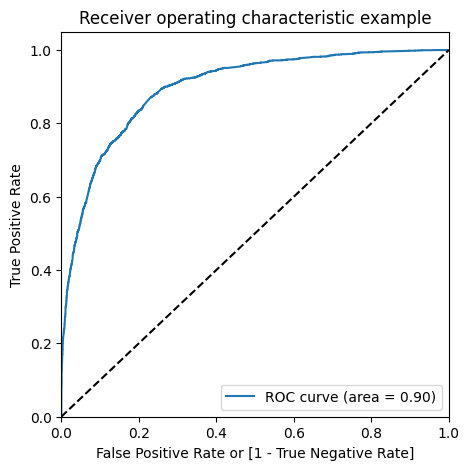

In [132]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [133]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.395345,0,1,1,1,1,0,0,0,0,0,0
1,1,0.996304,1,1,1,1,1,1,1,1,1,1,1
2,1,0.391994,0,1,1,1,1,0,0,0,0,0,0
3,0,0.135922,0,1,1,0,0,0,0,0,0,0,0
4,0,0.165244,0,1,1,0,0,0,0,0,0,0,0


In [134]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.641189,0.971825,0.440358
0.2,0.2,0.772446,0.921362,0.681992
0.3,0.3,0.807246,0.870900,0.768582
0.4,0.4,0.817575,0.776283,0.842656
0.5,0.5,0.825520,0.712784,0.893997
0.6,0.6,0.816304,0.639613,0.923627
0.7,0.7,0.792468,0.532801,0.950192
0.8,0.8,0.772128,0.448696,0.968582
0.9,0.9,0.730653,0.308242,0.987229


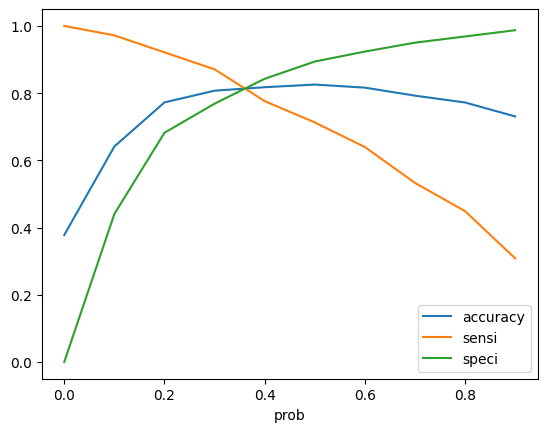

In [135]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.395345,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.996304,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.391994,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.135922,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165244,0,1,1,0,0,0,0,0,0,0,0,0


In [137]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8145558557126966

In [138]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3181,  734],
       [ 433, 1945]], dtype=int64)

In [139]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [140]:
# Calculating the sensitivity
TP/(TP+FN)

0.8179142136248949

In [141]:
# Calculating the specificity
TN/(TN+FP)

0.8125159642401022

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 81%

# Prediction on Test set



In [143]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [144]:
col = X_train.columns

In [145]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Hospitality Management,Specialization_Media and Advertising,Specialization_Retail Management,Specialization_Unknown,Lead Source_Direct Traffic,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
3308,1.0,0.117647,0.050176,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2169,1.0,0.588235,0.390405,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
7836,1.0,0.588235,0.227113,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8378,1.0,0.588235,0.179577,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1263,1.0,0.117647,0.376320,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [146]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.058532
1,1,0.804977
2,1,0.321959
3,0,0.030687
4,0,0.252672


In [147]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.058532,0
1,1,0.804977,1
2,1,0.321959,0
3,0,0.030687,0
4,0,0.252672,0
...,...,...,...
2693,1,0.082706,0
2694,1,0.813189,1
2695,0,0.052886,0
2696,1,0.962203,1


In [148]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.815418828762046

In [149]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1356,  321],
       [ 177,  844]], dtype=int64)

In [150]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [151]:
# Calculating the sensitivity
TP/(TP+FN)

0.8266405484818805

In [152]:
# Calculating the specificity
TN/(TN+FP)

0.8085867620751341

With the current cut off as 0.35 we have accuracy, sensitivity of around 82% and specificity of around 80%

# Precision-Recall


In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3500,  415],
       [ 683, 1695]], dtype=int64)

In [155]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8033175355450237

In [156]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7127838519764508

With the current cut off as 0.35 we have Precision around 80% and Recall around 71%

# Precision and recall tradeoff


In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    1
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

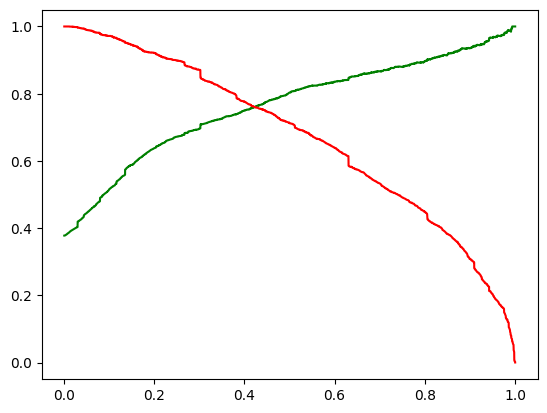

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.395345,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.996304,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.391994,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.135922,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165244,0,1,1,0,0,0,0,0,0,0,0,0


In [163]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8169394565390116

In [164]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  601],
       [ 551, 1827]], dtype=int64)

In [165]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [166]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7524711696869851

In [167]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7682926829268293

With the current cut off as 0.44 we have Precision around 75% and Recall around 76.3% and accuracy 82 %.

# Prediction on Test set


In [168]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.058532
1,1,0.804977
2,1,0.321959
3,0,0.030687
4,0,0.252672


In [169]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.058532,0
1,1,0.804977,1
2,1,0.321959,0
3,0,0.030687,0
4,0,0.252672,0
...,...,...,...
2693,1,0.082706,0
2694,1,0.813189,1
2695,0,0.052886,0
2696,1,0.962203,1


## Check the overall accuracy


In [170]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8169014084507042

In [171]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1429,  248],
       [ 246,  775]], dtype=int64)

In [172]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [173]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7575757575757576

In [174]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7590597453476984

With the current cut off as 0.41 we have Precision around 75% , Recall around 75% and accuracy 81%.

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model



## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

### TotalVisits
### The total time spend on the Website.
### Lead Origin_Lead Add Form
### Lead Source_Direct Traffic
### Lead Source_Google
### Lead Source_Welingak Website
### Lead Source_Organic Search
### Lead Source_Referral Sites
### Lead Source_Welingak Website
### Do Not Email_Yes
### Last Activity_Email Bounced
### Last Activity_Olark Chat Conversation